# Numerics for the SYK quantum batteries

let us start by including the relevant packages

In [1]:
include("/home/dario/Documents/ChargingPower/src/ChargingPower.jl")
using .ChargingPower

In [46]:
using SparseArrays
using KrylovKit
using ExponentialUtilities
using Graphs
using Plots
using Statistics
using SpecialFunctions

and let us set the parameters for the time evolution

In [3]:
min_t = 10^-1 
max_t = 10^2
number_of_points = 10^3
points = exp.(log(min_t):((log(max_t) - log(min_t)) / (number_of_points - 1)):log(max_t))

1000-element Vector{Float64}:
   0.10000000000000002
   0.10069386314760277
   0.10139254075588154
   0.1020960662306047
   0.10280447320933096
   0.10351779556301766
   0.1042360673976402
   0.10495932305582278
   0.10568759711848046
   0.10642092440647247
   ⋮
  94.61848194722003
  95.27500472427303
  95.93608287093146
  96.60174799522657
  97.27203192450544
  97.94696670695406
  98.62658461312826
  99.31091813749792
 100.00000000000004

## The Z-model charging power

Let us first collect the data for the Z-model battery

In [37]:
n_majorana = 28
samples_done = 0
average_power_list = zeros(Float64, length(points))

1000-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [44]:
n_samples = 1
power_single_size_list = Array{Float64}[] 
majorana_matrices = majorana_operators(n_majorana)
graph = complete_graph(n_majorana)
battery_hamiltonian = Z_model_hamiltonian(majorana_matrices)
for i in 1:n_samples 
    charging_hamiltonian = SYK_hamiltonian(majorana_matrices, graph)
    ground_state_rough = eigsolve(battery_hamiltonian, rand(ComplexF64, floor(Int, 2^(n_majorana/2))), 1, :SR)
    e_0 = real(ground_state_rough[1][1])
    ground_state = ground_state_rough[2][1]
    power_list = [0.0]
    for index in eachindex(points) 
        if index != length(points)
            ground_state = expv(- im * (points[index + 1] - points[index]), charging_hamiltonian, ground_state)
            push!(power_list, 2 * (real(ground_state' * battery_hamiltonian * ground_state) - e_0) / (points[index + 1] + points[index]))
        end
    end
    push!(power_single_size_list, power_list)
end
average_power_list = (samples_done .* average_power_list + n_samples * mean(power_single_size_list)) / (samples_done + n_samples)
samples_done += n_samples
samples_done


4

In [91]:
theoretical_points = [(n_majorana/2) * (1/t) * (1 - 1.0 * (besselj(1,  2.0*t) / t)^2) for t in points[2:length(points)]]

999-element Vector{Float64}:
 1.4037725487186992
 1.4134296964265654
 1.423152115057403
 1.432940221302283
 1.4427944339917766
 1.4527151740951458
 1.4627028647194917
 1.4727579311082943
 1.4828808006398513
 1.4930719028252075
 ⋮
 0.1479626358677955
 0.14694300291083212
 0.14593048005754936
 0.14492488833013303
 0.14392622643258335
 0.14293448758790542
 0.1419495106362492
 0.1409714080992003
 0.13999995871423979

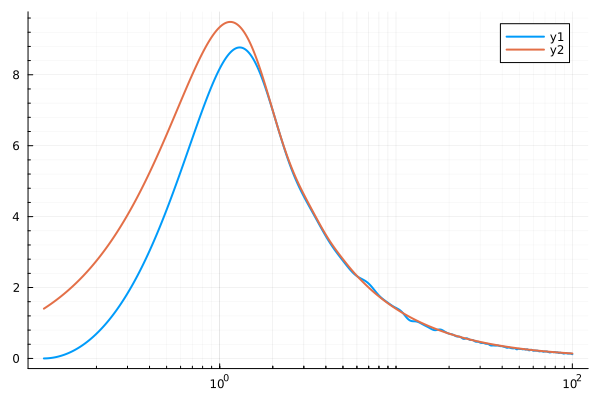

In [92]:
plot(points[2: length(points)], [average_power_list[2: length(points)], theoretical_points], xaxis=:log, linewidth=2, minorgrid=true)   